 # Assessing prevalence of cardiovascular diseases in U.S. states

  **Problem:**
  
  Cardiovascular diseases (CVD) are estimated to be the leading cause of death and disability-adjusted life years lost worldwide.(1) According to the World Health Organization global estimates of mortality and burden of disease, around 17.3 million people died from CVD in 2008 representing 30% of all global deaths. (2,3) As estimated, one in three U.S. adults (about 71.3 million) has one or more types of CVD. By 2030, annual direct medical costs associated with CVDs are projected to rise to more than 818 billion dollars, while lost productivity costs could exceed 275 billion dollars.(4) Reducing CVD-associated medical costs would substantially decrease the economic burden on the healthcare system.
  
  The underlying cause of CVD is atherosclerosis, a process mainly governed by lifestyle factors (risk factors). The prevalence of CVD increases with advancing age and varies within racial, ethnic, geographic, and sociodemographic groups. Identification of such global risk factors has led to the development of risk-prediction algorithms and cardiovascular risk models for men and women. However, they cannot fully explain the excess cardiovascular risk, and at least 25% of all future events occur in individuals with only one of the classical risk factors. Moreover, the prevalence of risk factors is almost as high in individuals without the disease as in patients affected by it. Socioeconomic inequalities also have been associated with greater subsequent socioeconomic differences in cardiovascular disease. Within high-income countries, low income and low educational status are consistently associated with greater risk of cardiovascular disease.

  **References:**
1. G Vilahur et all (2014) Perspectives: The burden of cardiovascular risk factors and coronary heart disease in Europe and worldwide. Eur Heart J Suppl (2014) 16
2. R Lozano et all (2010) Lancet, 2012, vol. 380(pg. 2095-2128)
3. Global Status Report on Noncommunicable Diseases, 2010 Geneva World Health Organization
4. http://www.cdcfoundation.org/pr/2015/heart-disease-and-stroke-cost-america-nearly-1-billion-day-medical-costs-lost-productivity


**Questions:**

- Is there a correlation between the prevalence of risk factors (obesity, physical inactivity, cholesterol level, hypertension, smoking, and diabetes) and CVD (CHD, stroke, and heart attack)?
- Is there any correlation between the prevalence of risk factors and CVD in different states and their socioeconomic characteristics (education, GDP, household income, and healthcare spending) and geographic factors (climate and location)?
- What is the rank of the prevalence of risk factors and CVD in different break out groups (age: 25-44, 45-64, 65+; gender: male and female; race/ethnicity: non-Hispanic White, non-Hispanic Black, Hispanic)?
- What factors/characteristics contribute most to the prevalence of CVD?
- Can the prevalence of CVD be modelled and predicted?


**Proposed Clients:**

  *U.S. federal and state health agencies*: Healthcare spending in U.S. is characterized as the most costly compared to all developed countries. The Centers for Medicare and Medicaid reported in 2014 that U.S. healthcare costs were 17.4% GDP in 2013. Therefore, the economic effect of accurate budget planning and reduction and optimization of healthcare spending is hard to overestimate. In addition, increased adherence to clinical and community-level guidelines as well as renewed emphasis on policy, environmental, and lifestyle changes will be crucial for effective prevention and control of CVD.
  
  *Insurance companies*: Premium rates for policyholders are calculated with the help of risk assessment, which are based on an individual’s key indicators. However, the merits of the numerous composite risk scores currently used for estimating an individual's future risk of CVD has been debated. Correct risk assessment could save millions of dollars for insurance companies.


**Data:**

[Prevalence of traditional risk factors and CVD among U.S. population (state, gender, race, age group, and geolocation for 2011-2014)](https://catalog.data.gov/dataset/behavioral-risk-factor-data-heart-disease-amp-stroke-prevention)

[Health spending - U.S. states](http://kff.org/other/state-indicator/health-spending-per-capita-by-service/?currentTimeframe=0&selectedRows=%7B%7D)

[Education - U.S. states](https://en.wikipedia.org/wiki/List_of_U.S._states_by_educational_attainment)

[GDP per capita - U.S.states](https://en.wikipedia.org/wiki/List_of_U.S._states_by_GDP_per_capita)

[Geolocation - U.S. states](https://inkplant.com/code/state-latitudes-longitudes)

[Average annual temperature - U.S. states](https://www.currentresults.com/Weather/US/average-annual-state-temperatures.php)


## Data wrangling

In [141]:
## Importing modules and setting environment
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context(rc={"figure.figsize": (6,3)})
import scipy.stats as stats
import inspect
import numpy as np
import os

os.chdir(r'C:\Users\Igor\Jupyter_Notebook_Projects\Capstone project')

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [72]:
# Importing CVD and RF data into a dataframe
df = pd.DataFrame.from_csv('Risk_Factors_CVD.csv', index_col=None)

In [73]:
## Cleaning data:
# Removing repetitive age categories as well as 18-24 group (null values for many factors)
# Removing 'Nutrition' topic (controversial)
# Removing 'Overall' break out and average US LocationID rows
# Selecting year - 2013 data set is most informative
# Removing Washington, DC (outlier, not a good representation)
# Removing 'Non-Hispanic Asian' group (not complete)
a = df.Break_out != '35+'
b = df.Break_out != '75+'
c = df.Break_out != '20-24'
d = df.Break_out != '18-24'
e = df.Break_out != 'Overall'
f = df.Break_out != 'Non-Hispanic Asian'
g = df.LocationAbbr != 'DC'
h = df.Year == 2013
i = df.LocationID != 0.5
j = df.Topic != 'Nutrition'

df1 = df[(a) & (b) & (c) & (d) & (e) & (f) & (g) & (h) & (i) & (j)] # creating a new df1

In [74]:
## Cleaning data:
# Removing repetitive indicators and creating new df2
list = ('post-hospitalization', 'Objective 6', 'Objective 7', 'screening', 'Objective 5', 'Objective 11', 'hypertension medication', 'Objective 8', 'Objective 9')

df2 = df1[~df.Indicator.str.contains('|'.join(list))]

C:\Users\Igor\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [75]:
## Cleaning data:
# Removing rows with null prevalence values and creating new df3
df3 = df2.dropna(subset=['Data_Value'])

In [76]:
# Renaming a few topics
df3 = df3.replace('Acute Myocardial Infarction (Heart Attack)', 'Heart_attack')
df3 = df3.replace('Coronary Heart Disease', 'CHD')
df3 = df3.replace('Physical Inactivity', 'Phys_inact')
df3 = df3.replace('Cholesterol Abnormalities', 'Cholesterol')

In [77]:
# Comparing the number of rows in data frames after cleaning
print(len(df))
print(len(df1))
print(len(df2))
print(len(df3))

35004
7970
4050
3533


In [78]:
# Importing US states socioeconomic data (excluding Washingon, DC) from a csv file to a dataframe
df_us = pd.DataFrame.from_csv('USA_info_excl_DC.csv', index_col=None, encoding='cp1252')
df_us.head()

,LocationID,LocationDesc,GDP_2012,Healthcare_spending_2009,Bachelor_degree,Advanced_degree,Median_household_income_2014,Average_annual_Temp_C,Latitude,Longitude
0,1,Alabama,32615,6271.67,0.235,0.087,41415,17.1,32.806671,-86.791130
1,2,Alaska,61156,9127.65,0.280,0.110,60287,-3.0,61.370716,-152.404419
2,4,Arizona,35195,5433.89,0.275,0.102,46709,15.7,33.729759,-111.431221
3,5,Arkansas,31837,6166.94,0.211,0.075,38758,15.8,34.969704,-92.373123
4,6,California,46029,6237.61,0.314,0.116,67458,15.2,36.116203,-119.681564


In [79]:
# Creating new dataframes for RF and CVD including location ID, which is to be used as a key for merging
# Grouping by state and calculating mean combined prevalence values for each state
rf = df3[(df3.Category == 'Risk Factors')][['LocationID', 'Topic', 'Data_Value']].groupby(['LocationID', 'Topic']).mean()
rf = rf.unstack('Topic')['Data_Value'].reset_index()
cvd = df3[df3.Category == 'Cardiovascular Diseases'][['LocationID', 'Topic', 'Data_Value']].groupby(['LocationID', 'Topic']).mean()
cvd = cvd.unstack('Topic')['Data_Value'].reset_index()

In [80]:
# Merging dataframes
df_merged_cvd = pd.merge(df_us, cvd, on='LocationID', how='inner')
df_merged = pd.merge(df_merged_cvd, rf, on='LocationID', how='inner')
df_merged.head()

,LocationID,LocationDesc,GDP_2012,Healthcare_spending_2009,Bachelor_degree,Advanced_degree,Median_household_income_2014,Average_annual_Temp_C,Latitude,Longitude,CHD,Heart_attack,Stroke,Cholesterol,Diabetes,Hypertension,Obesity,Phys_inact,Smoking
0,1,Alabama,32615,6271.67,0.235,0.087,41415,17.1,32.806671,-86.791130,6.666667,7.216667,5.214286,41.925000,15.414286,40.611111,33.175000,31.777778,21.414286
1,2,Alaska,61156,9127.65,0.280,0.110,60287,-3.0,61.370716,-152.404419,5.066667,4.933333,3.700000,37.044444,8.757143,36.666667,31.677778,24.650000,21.566667
2,4,Arizona,35195,5433.89,0.275,0.102,46709,15.7,33.729759,-111.431221,5.460000,5.300000,3.720000,39.687500,12.622222,34.522222,28.975000,27.000000,15.871429
3,5,Arkansas,31837,6166.94,0.211,0.075,38758,15.8,34.969704,-92.373123,7.357143,6.383333,5.771429,40.966667,12.914286,39.655556,36.675000,35.977778,24.662500
4,6,California,46029,6237.61,0.314,0.116,67458,15.2,36.116203,-119.681564,3.537500,4.033333,2.644444,38.177778,12.544444,33.255556,24.977778,22.511111,12.211111


## Data Analysis

### Determining correlation between RF, CVD, socioeconomic, and geographic factors

In [81]:
# Creating a dataframe for heatmap - removing columns containing string values and ID column
df_sns = df_merged.drop(['LocationID', 'LocationDesc'], axis=1)

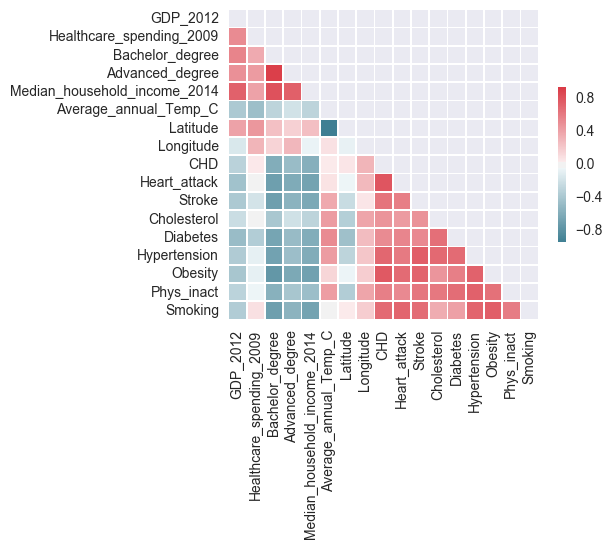

In [82]:
# Computing the correlation matrix
corr = df_sns.corr()

# Generating a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 4))

# Generating a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True,#xticklabels=0, yticklabels=0,#
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

**There is a positive correlation between RF and CVD as well as between many RF. Amomg various RF, obesity, smoking and hypertension show highest correlation with all three CVD. Geographical factors contribute less to the prevalence of both RF and CVD, though the prevalence of stroke and all RF excluding physical inactivity and obesity is higher in southern states. Surprisingly, there is not much correlation between healthcare spending and the prevalence of both RF and CVD except diabetes. At the same time, states with higher GDP per capita do have a lower prevalence of both RF and CVD. However, most important socioeconomic factors are education and median household income. The states that have higher education rate (both Bachelor and advanced degrees) and median household income show significantly lower prevalence of both RF and CVD. These socioeconomic factors are positevely related between each other.**

### Visualizing distribution of prevalence of RF and CVD among U.S. states

In [83]:
# Creating dataframes for each RF
diabetes = df_merged[['LocationDesc', 'Diabetes']].groupby('LocationDesc').mean().sort_values(by='Diabetes')
hypertension = df_merged[['LocationDesc', 'Hypertension']].groupby('LocationDesc').mean().sort_values(by='Hypertension')
phys_inact = df_merged[['LocationDesc', 'Phys_inact']].groupby('LocationDesc').mean().sort_values(by='Phys_inact')
smoking = df_merged[['LocationDesc', 'Smoking']].groupby('LocationDesc').mean().sort_values(by='Smoking')
obesity = df_merged[['LocationDesc', 'Obesity']].groupby('LocationDesc').mean().sort_values(by='Obesity')
cholesterol = df_merged[['LocationDesc', 'Cholesterol']].groupby('LocationDesc').mean().sort_values(by='Cholesterol')


In [84]:
# Creating a function to get name of a variable / list
def retrieve_name(var):
    """
    Gets the name of variable - does it from the out most frame inner-wards
    :param var: variable to get name from
    :return: string
    """
    for fi in reversed(inspect.stack()):
        names = [var_name for var_name, var_val in fi.frame.f_locals.items() if var_val is var]
        if len(names) > 0:
            return names[0]

In [85]:
def plot_topic(*args):
    """
    Plots a line graph
    :param args: one (or more) pandas series, list, or numpy array
    :return: plot
    """
    colors = ['black', 'red', 'green', 'blue', 'yellow', 'grey', 'pink', 'magenta', 'brown']
    ncolor = 0
    for topic in args:
        name = retrieve_name(topic)
        a = np.array(topic.unstack())
        i = np.arange(len(a))
        plt.plot(i, a, linewidth=2, label=name, color=colors[ncolor])
        ncolor += 1
    plt.ylabel('Prevalence (%)')
    plt.legend(loc=2)
    plt.xlim([-25,55])
    plt.ylim([5,45])
    plt.xlabel('State Rank')

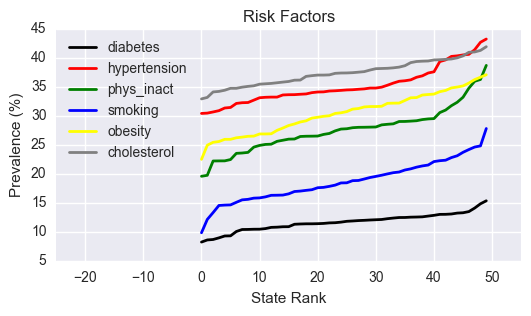

In [86]:
# Plotting state-ranked prevalence of RF
plot_topic(diabetes, hypertension, phys_inact, smoking, obesity, cholesterol)
plt.title('Risk Factors')

In [87]:
# Creating dataframes for each CVD
heart_attack = df_merged[['LocationDesc', 'Heart_attack']].groupby('LocationDesc').mean().sort_values(by='Heart_attack')
CHD = df_merged[['LocationDesc', 'CHD']].groupby('LocationDesc').mean().sort_values(by='CHD')
stroke = df_merged[['LocationDesc', 'Stroke']].groupby('LocationDesc').mean().sort_values(by='Stroke')

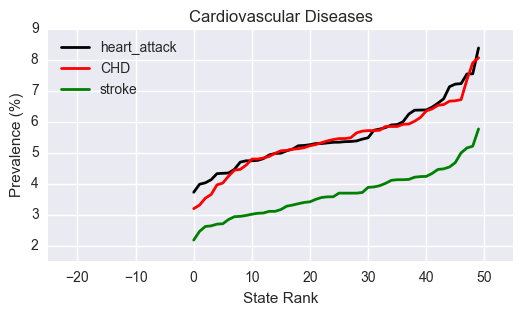

In [88]:
# Plotting state-ranked prevalence of CVD
plot_topic(heart_attack, CHD, stroke)
plt.ylim([1.5,9])
plt.title('Cardiovascular Diseases')

**Distribution of the prevalence of most RF and all three CVD can be described by a logistic function**

### Statistical description of prevalence of RF and CVD among U.S. population

In [89]:
# Creating a function to get statistics on topics (CVD and RF)
def statdesc_topic (*args):
    """
    Gets statistics
    :param args: one (or more) strings
    :return: print the object name and statistics
    """
    for i in args:
        a = df3[(df3.Topic == i)].sort_values(by='Data_Value')['Data_Value']
        n = len(a)
        mean = np.mean(a)
        std = np.std(a)
        sem = stats.sem(a)
        skewness = stats.skew(a)
        print('Group name: ', i)
        print('n: ', n)
        print('mean: ', mean)
        print('std: ', std)
        print('skewness: ', skewness)
        print('----------------------------------')

In [90]:
# Getting statistics on RF
statdesc_topic('Hypertension', 'Obesity', 'Smoking', 'Phys_inact', 'Diabetes', 'Cholesterol')

Group name:  Hypertension
n:  448
mean:  35.206250000000004
std:  12.648074961163626
skewness:  0.8291973551909884
----------------------------------
Group name:  Obesity
n:  413
mean:  30.33317191283292
std:  6.639914441380095
skewness:  -0.33270837479028714
----------------------------------
Group name:  Smoking
n:  403
mean:  18.670223325062025
std:  6.084357905019971
skewness:  -0.07549730728899454
----------------------------------
Group name:  Phys_inact
n:  438
mean:  27.699999999999985
std:  5.954657438130208
skewness:  0.41782667909584753
----------------------------------
Group name:  Diabetes
n:  416
mean:  11.720913461538462
std:  5.407239638830689
skewness:  0.6073174944331317
----------------------------------
Group name:  Cholesterol
n:  436
mean:  37.436697247706405
std:  9.488637923447497
skewness:  0.393228292911245
----------------------------------


In [91]:
# Getting statistics on CVD
statdesc_topic('Heart_attack', 'CHD', 'Stroke')

Group name:  Heart_attack
n:  337
mean:  5.499999999999999
std:  3.531502987838992
skewness:  1.321397929366628
----------------------------------
Group name:  CHD
n:  319
mean:  5.38025078369906
std:  3.4234419516097687
skewness:  1.438244720501297
----------------------------------
Group name:  Stroke
n:  323
mean:  3.6730650154798763
std:  2.139887779264906
skewness:  1.2254180820175533
----------------------------------


In [92]:
# Creating a function to plot probability density for topics
def plot_pdf_topic(*args):
    """
    Plots a line graph
    :param args: one (or more) strings
    :return: plot
    """
    colors = ['black', 'red', 'green', 'blue', 'yellow', 'grey', 'pink', 'magenta', 'brown']
    ncolor = 0
    
    for i in args:
        a = df3[(df3.Topic == i)].sort_values(by='Data_Value')['Data_Value']
        pdf = stats.norm.pdf(a, np.mean(a), np.std(a))
        plt_fit = plt.plot(a, pdf, linewidth=2, label=i, color=colors[ncolor])
        ncolor += 1
    plt.xlabel('Prevalence {%}')
    plt.ylabel('Probability Density')
    plt.legend(loc=2)

(-23, 80)

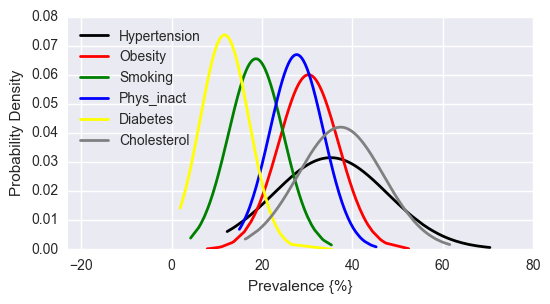

In [93]:
# Plotting probability density for RF
plot_pdf_topic('Hypertension', 'Obesity', 'Smoking', 'Phys_inact', 'Diabetes', 'Cholesterol')
plt.xlim([-23,80])

(-5, 20)

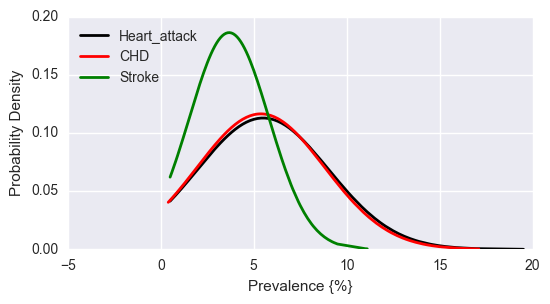

In [94]:
# Plotting probability density for CVD
plot_pdf_topic('Heart_attack', 'CHD', 'Stroke')
plt.xlim([-5,20])

** Based on skewness and probability density, one can conclude that distribution of prevalence of all RF and CVD among U.S. population is normal. Sample size is high and similar for all RF and CVD. Therefore, combined prevalence of RF and CVD will be used in further analysis. There is no need to calculate average RF and CVD values, since there are already two categories: risk factors and cardiovascular diseases that include all RF and CVD, respectively, in the original data file.**

### Determining states with highest and lowest prevalence of RF and CVD

In [95]:
# Creating new dataframes for RF and CVD including location ID which is to be used a key for merging
# Grouping by state and calculating mean combined prevalence values for each state
rf1 = df3[(df3.Category == 'Risk Factors')][['LocationID', 'LocationDesc', 'Data_Value']].groupby(['LocationID', 'LocationDesc']).mean().reset_index()
cvd1 = df3[df3.Category == 'Cardiovascular Diseases'][['LocationID', 'Data_Value']].groupby('LocationID').mean().reset_index()

# Merging dataframes
df_cvd_rf = pd.merge(rf1, cvd1, on='LocationID', how='inner')
df_cvd_rf = df_cvd_rf.rename(columns={'Data_Value_x': 'RF', 'Data_Value_y': 'CVD'})
df_cvd_rf.head()

,LocationID,LocationDesc,RF,CVD
0,1.0,Alabama,31.460417,6.305263
1,2.0,Alaska,27.472549,4.566667
2,4.0,Arizona,26.554000,4.826667
3,5.0,Arkansas,32.610000,6.510000
4,6.0,California,23.946296,3.400000


In [96]:
# Listing 10 states with highest prevalence of RF
df_cvd_rf.sort_values(by='RF', ascending=False).head(10)[['LocationDesc', 'RF']]

,LocationDesc,RF
23,Mississippi,33.748000
3,Arkansas,32.610000
47,West Virginia,32.370000
41,Tennessee,31.668889
0,Alabama,31.460417
16,Kentucky,31.238000
17,Louisianna,31.167347
35,Oklahoma,30.516981
13,Indiana,29.236538
39,South Carolina,29.173077


In [97]:
# Listing 10 states with highest prevalence of CVD
df_cvd_rf.sort_values(by='CVD', ascending=False).head(10)[['LocationDesc', 'CVD']]

,LocationDesc,CVD
47,West Virginia,6.805556
41,Tennessee,6.650000
3,Arkansas,6.510000
0,Alabama,6.305263
17,Louisianna,6.222222
16,Kentucky,5.995238
40,South Dakota,5.994444
23,Mississippi,5.715000
18,Maine,5.562500
34,Ohio,5.500000


In [98]:
# Listing 10 states with lowest prevalence of RF
df_cvd_rf.sort_values(by='RF', ascending=True).head(10)[['LocationDesc', 'RF']]

,LocationDesc,RF
5,Colorado,22.240741
10,Hawaii,23.094118
43,Utah,23.346154
4,California,23.946296
46,Washington,24.094444
22,Minnesota,24.139216
44,Vermont,24.452273
25,Montana,24.600000
20,Massachussettes,24.640741
36,Oregon,25.068000


In [99]:
# Listing 10 states with lovest prevalence of CVD
df_cvd_rf.sort_values(by='CVD', ascending=True).head(10)[['LocationDesc', 'CVD']]

,LocationDesc,CVD
5,Colorado,3.163636
4,California,3.400000
10,Hawaii,3.480952
30,New Mexico,3.631818
20,Massachussettes,3.640000
22,Minnesota,3.668750
43,Utah,3.722222
29,New Jersey,3.964000
19,Maryland,4.160000
6,Connecticut,4.284211


C:\Users\Igor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


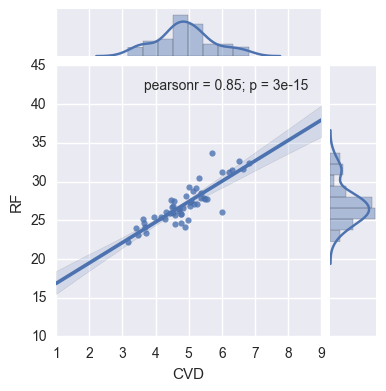

In [100]:
# Correlation between prevalence of RF and CVD
sns.jointplot(df_cvd_rf.CVD, df_cvd_rf.RF, kind='reg', size=4)

** The analysis shows that Colorado, Hawaii, and California are among the four states with lowest prevalence rate of RF and CVD. Arkansas, Tennessee, and West Virginia are among the four states with highest prevalence of RF and CVD. Correlation bewtween prevalence of RF and CVD is statistically significant at the 0.1% level.**

### Visualization and statistical analysis of correlation between RF and CVD and socioeconomic factors

In [101]:
# Creating a dataframe merging CVD and RF with US states socioeconomic data
df_us_del = df_us.drop('LocationDesc', axis=1)
df4 = pd.merge(df_cvd_rf, df_us_del, on='LocationID', how='inner')
# Changing $US values in columns to thousands
df4[['GDP_2012']] = df4.GDP_2012/1000
df4[['Healthcare_spending_2009']] = df4.Healthcare_spending_2009/1000
df4[['Median_household_income_2014']] = df4.Median_household_income_2014/1000
df4.head()

,LocationID,LocationDesc,RF,CVD,GDP_2012,Healthcare_spending_2009,Bachelor_degree,Advanced_degree,Median_household_income_2014,Average_annual_Temp_C,Latitude,Longitude
0,1.0,Alabama,31.460417,6.305263,32.615,6.27167,0.235,0.087,41.415,17.1,32.806671,-86.791130
1,2.0,Alaska,27.472549,4.566667,61.156,9.12765,0.280,0.110,60.287,-3.0,61.370716,-152.404419
2,4.0,Arizona,26.554000,4.826667,35.195,5.43389,0.275,0.102,46.709,15.7,33.729759,-111.431221
3,5.0,Arkansas,32.610000,6.510000,31.837,6.16694,0.211,0.075,38.758,15.8,34.969704,-92.373123
4,6.0,California,23.946296,3.400000,46.029,6.23761,0.314,0.116,67.458,15.2,36.116203,-119.681564


C:\Users\Igor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


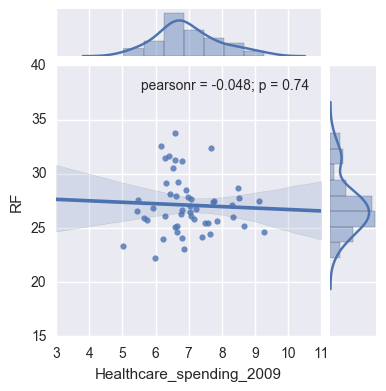

In [102]:
# Correlation between prevalence of RF and healthcare spending 
sns.jointplot(df4.Healthcare_spending_2009, df4.RF, kind='reg', size=4)

C:\Users\Igor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


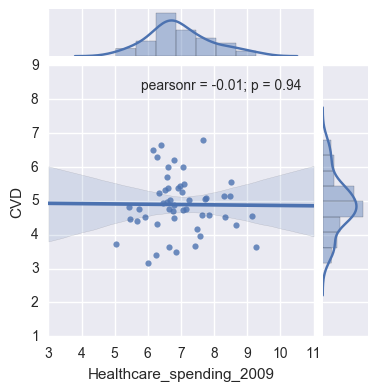

In [103]:
# Correlation between prevalence of CVD and healthcare spending 
sns.jointplot(df4.Healthcare_spending_2009, df4.CVD, kind='reg', size=4)

C:\Users\Igor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


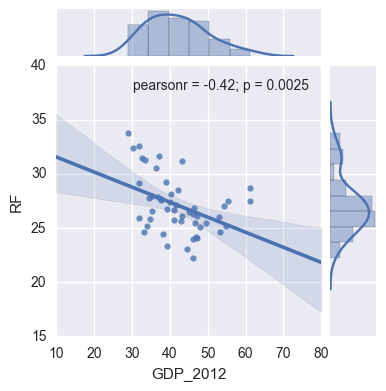

In [104]:
# Correlation between prevalence of RF and GDP 
sns.jointplot(df4.GDP_2012, df4.RF, kind='reg', size=4)

C:\Users\Igor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


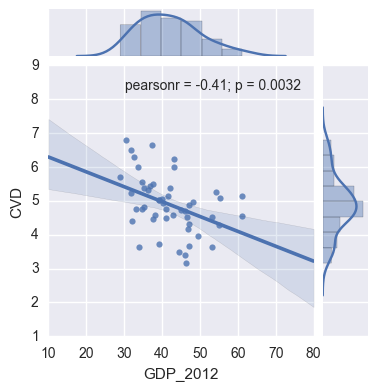

In [105]:
# Correlation between prevalence of CVD and GDP
sns.jointplot(df4.GDP_2012, df4.CVD, kind='reg', size=4)

C:\Users\Igor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


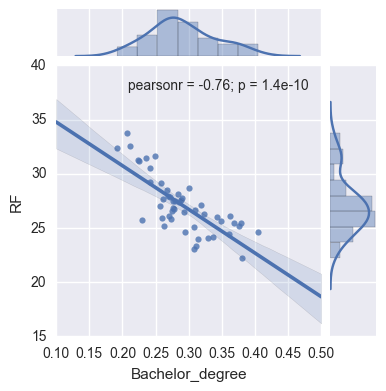

In [106]:
# Correlation between prevalence of RF and the level of education 
sns.jointplot(df4.Bachelor_degree, df4.RF, kind='reg', size=4)

C:\Users\Igor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


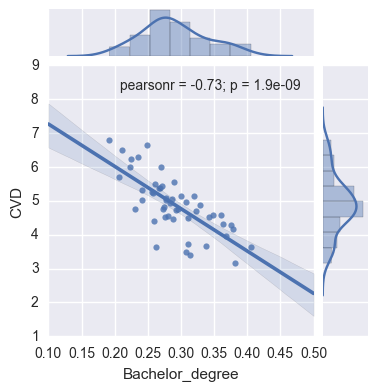

In [107]:
# Correlation between prevalence of CVD and the level of education 
sns.jointplot(df4.Bachelor_degree, df4.CVD, kind='reg', size=4)

C:\Users\Igor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


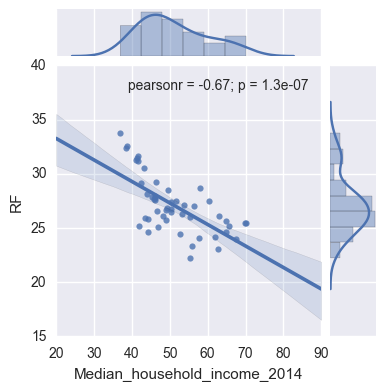

In [108]:
# Correlation between prevalence of RF and median household income 
sns.jointplot(df4.Median_household_income_2014, df4.RF, kind='reg', size=4)

C:\Users\Igor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


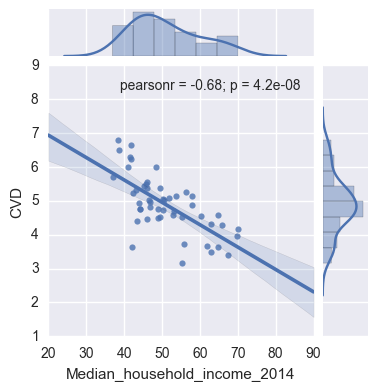

In [109]:
# Correlation between prevalence of CVD and median household income 
sns.jointplot(df4.Median_household_income_2014, df4.CVD, kind='reg', size=4)

C:\Users\Igor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


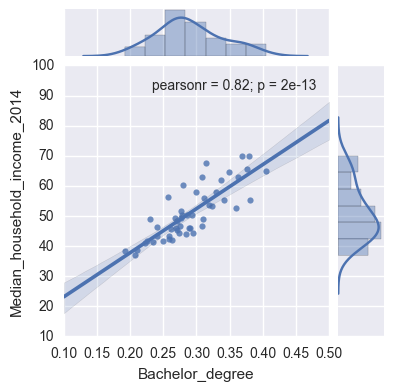

In [110]:
# Correlation between the level of education and median household income
sns.jointplot(df4.Bachelor_degree, df4.Median_household_income_2014, kind='reg', size=4)

C:\Users\Igor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


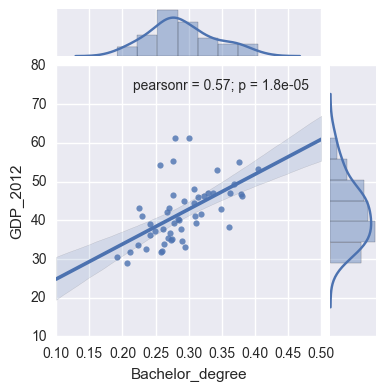

In [111]:
# Correlation between the level of education and GDP
sns.jointplot(df4.Bachelor_degree, df4.GDP_2012, kind='reg', size=4)

C:\Users\Igor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


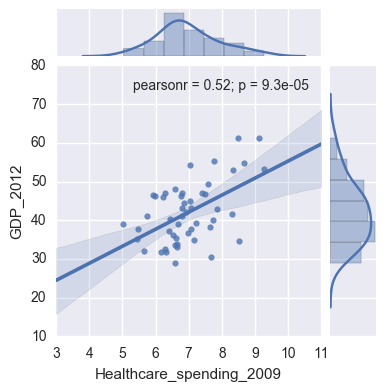

In [112]:
# Correlation between GDP and healthcare spending
sns.jointplot(df4.Healthcare_spending_2009, df4.GDP_2012, kind='reg', size=4)

**The analysis confirms the previously drawn conclusion that an increase in healthcare spending does not reduce the prevalence of both RF and CVD, and, with the 0.1% significance level, higher education level and household income are crucial factors in decreasing the prevalence of RF and CVD. There is also statistically significant positive relationship at the 1% level between GDP and both RF and CVD, though the correlation coefficient is lower.**

### Determining the difference in prevalence of RF and CVD between various demographic groups

### 1) Gender

In [113]:
# Creating a function to get total statistics for RF and CVD on break out groups
def statdesc_group (*args, category):
    """
    Gets statistics
    :param args: one (or more) strings
    :param category: string
    :return: print the object name and statistic
    """
    print('Category: ', category)
    print('**********************************')
    
    for i in args:
        a = df3[(df3.Category == category) & (df3.Break_out == i)].sort_values(by='Data_Value')['Data_Value']
        n = len(a)
        mean = np.mean(a)
        std = np.std(a)
        sem = stats.sem(a)
        skewness = stats.skew(a)
        print('Group name: ', i)
        print('n: ', n)
        print('mean: ', mean)
        print('std: ', std)
        print('skewness: ', skewness)
        print('----------------------------------')

In [114]:
# Getting statistics on combined RF in the gender groups
statdesc_group('Male', 'Female', category='Risk Factors')

Category:  Risk Factors
**********************************
Group name:  Male
n:  300
mean:  26.253333333333323
std:  9.502050071198084
skewness:  -0.44139306624627067
----------------------------------
Group name:  Female
n:  300
mean:  24.124000000000002
std:  9.091205860610568
skewness:  -0.46424999859542526
----------------------------------


In [115]:
# Creating a function to plot probability density of combined RF or CVD in groups
def plot_pdf_group(*args, category):
    """
    Plots a line graph
    :param args: one (or more) strings
    :param category: string
    :return: plot
    """
    colors = ['black', 'red', 'green', 'blue', 'yellow', 'grey', 'pink', 'magenta', 'brown']
    ncolor = 0
    
    for i in args:
        a = df3[(df3.Category == category) & (df3.Break_out == i)].sort_values(by='Data_Value')['Data_Value']
        pdf = stats.norm.pdf(a, np.mean(a), np.std(a))
        plt_fit = plt.plot(a, pdf, linewidth=2, label=i, color=colors[ncolor])
        ncolor += 1
    plt.xlabel('Prevalence {%}')
    plt.legend(loc=2)
    plt.ylabel('Probability Density')

(0, 50)

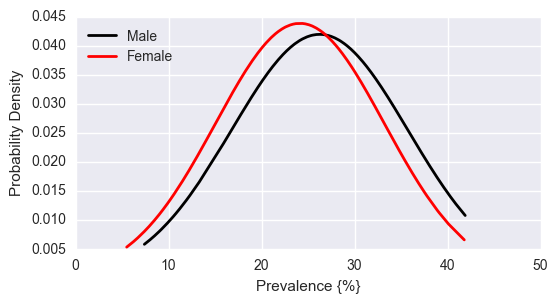

In [116]:
# Plotting probability density for combined RF in gender groups
plot_pdf_group('Male', 'Female', category='Risk Factors')
plt.xlim([0,50])

In [117]:
# Creating a function to calculate confidence intervals
def ConfInt_group(*args, category, level):
    """
    Determines confidence intervals at confidence level
    :param args: one (or more) strings
    :param level: float 
    :param category: string
    :return: confidence intervals
    """
    print('Category: ', category)
    print('**********************************')
    
    for i in args:
        a = df3[(df3.Category == category) & (df3.Break_out == i)].sort_values(by='Data_Value')['Data_Value']
        int1, int2 = stats.norm.interval(level, loc=np.mean(a), scale=stats.sem(a))
        print('Group name: ', i)
        print(int1, '-', int2)
        print('---------------------------------')

In [118]:
# Calculating confidence intervals for combined RF in the gender groups
ConfInt_group('Male', 'Female', category='Risk Factors', level=0.95)

Category:  Risk Factors
**********************************
Group name:  Male
25.1762983461 - 27.3303683205
---------------------------------
Group name:  Female
23.0935332361 - 25.1544667639
---------------------------------


In [119]:
# Creating RF series for all break out groups for Anova test
rf_male = df3[(df3.Category == 'Risk Factors') & (df3.Break_out == 'Male')]['Data_Value']
rf_female = df3[(df3.Category == 'Risk Factors') & (df3.Break_out == 'Female')]['Data_Value']
rf_race_b = df3[(df3.Category == 'Risk Factors') & (df3.Break_out == 'Non-Hispanic Black')]['Data_Value']
rf_race_w = df3[(df3.Category == 'Risk Factors') & (df3.Break_out == 'Non-Hispanic White')]['Data_Value']
rf_race_h = df3[(df3.Category == 'Risk Factors') & (df3.Break_out == 'Hispanic')]['Data_Value']
rf_race_o = df3[(df3.Category == 'Risk Factors') & (df3.Break_out == 'Other')]['Data_Value']
rf_25_44 = df3[(df3.Category == 'Risk Factors') & (df3.Break_out == '25-44')]['Data_Value']
rf_45_64 = df3[(df3.Category == 'Risk Factors') & (df3.Break_out == '45-64')]['Data_Value']
rf_65 = df3[(df3.Category == 'Risk Factors') & (df3.Break_out == '65+')]['Data_Value']

In [120]:
# One-way Anova test
# computing the f test statistic and p value for RF in the gender groups
f_val, p_val = stats.f_oneway(rf_male, rf_female)
print('Category: ', 'Risk Factors')
print('****************************')
print('f value: ', f_val)
print('p value: ', p_val)

Category:  Risk Factors
****************************
f value:  7.83908911902
p value:  0.00527795393521


In [121]:
# Getting statistics on combined CVD in the gender groups
statdesc_group('Male', 'Female', category='Cardiovascular Diseases')

Category:  Cardiovascular Diseases
**********************************
Group name:  Male
n:  150
mean:  4.552666666666668
std:  1.5495245148826213
skewness:  0.2312243602122519
----------------------------------
Group name:  Female
n:  150
mean:  2.930666666666666
std:  0.7231363787158146
skewness:  0.664103194645088
----------------------------------


(0, 10)

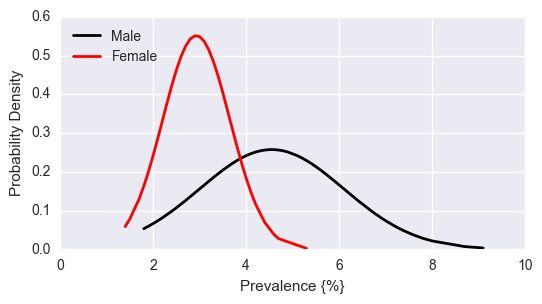

In [122]:
# Plotting probability density for combined CVD in the gender groups
plot_pdf_group('Male', 'Female', category='Cardiovascular Diseases')
plt.xlim([0,10])

In [123]:
# Calculating confidence intervals for combined CVD in the gender groups
ConfInt_group('Male', 'Female', category='Cardiovascular Diseases', level=0.95)

Category:  Cardiovascular Diseases
**********************************
Group name:  Male
4.30386492947 - 4.80146840386
---------------------------------
Group name:  Female
2.81455518503 - 3.0467781483
---------------------------------


In [124]:
# Creating CVD series for all break out groups for Anova test
cvd_male = df3[(df3.Category == 'Cardiovascular Diseases') & (df3.Break_out == 'Male')]['Data_Value']
cvd_female = df3[(df3.Category == 'Cardiovascular Diseases') & (df3.Break_out == 'Female')]['Data_Value']
cvd_race_b = df3[(df3.Category == 'Cardiovascular Diseases') & (df3.Break_out == 'Non-Hispanic Black')]['Data_Value']
cvd_race_w = df3[(df3.Category == 'Cardiovascular Diseases') & (df3.Break_out == 'Non-Hispanic White')]['Data_Value']
cvd_race_h = df3[(df3.Category == 'Cardiovascular Diseases') & (df3.Break_out == 'Hispanic')]['Data_Value']
cvd_race_o = df3[(df3.Category == 'Cardiovascular Diseases') & (df3.Break_out == 'Other')]['Data_Value']
cvd_25_44 = df3[(df3.Category == 'Cardiovascular Diseases') & (df3.Break_out == '25-44')]['Data_Value']
cvd_45_64 = df3[(df3.Category == 'Cardiovascular Diseases') & (df3.Break_out == '45-64')]['Data_Value']
cvd_65 = df3[(df3.Category == 'Cardiovascular Diseases') & (df3.Break_out == '65+')]['Data_Value']

In [125]:
# One-way Anova
# computing the f test statistic and p value for CVD in the gender groups
f_val, p_val = stats.f_oneway(cvd_male, cvd_female)
print('Category: ', 'Cardiovascular Diseases')
print('***********************************')
print('f value: ', f_val)
print('p value: ', p_val)

Category:  Cardiovascular Diseases
***********************************
f value:  134.065694791
p value:  7.52884301904e-26


**There is a stastically significant difference in the prevalence of both RF and CVD at the 1% and 0.1% level, respectively, between males and females. However, the difference in the prevalence of CVD is much bigger, which implies that other, non-traditional risk factors including gender differences contribute to the pathophysiological mechanisms of CVD.** 

## 2) Race / ethnicity

In [126]:
# Getting statistics on combined RF in the race groups
statdesc_group('Non-Hispanic Black', 'Non-Hispanic White', 'Hispanic', 'Other', category='Risk Factors')

Category:  Risk Factors
**********************************
Group name:  Non-Hispanic Black
n:  261
mean:  31.92835249042146
std:  10.324213660476428
skewness:  -0.37201962406579764
----------------------------------
Group name:  Non-Hispanic White
n:  300
mean:  24.25300000000001
std:  9.226315136607896
skewness:  -0.4815708682888628
----------------------------------
Group name:  Hispanic
n:  274
mean:  28.302919708029187
std:  9.775691896702076
skewness:  -0.34802705529323064
----------------------------------
Group name:  Other
n:  219
mean:  24.049771689497724
std:  10.05743494459543
skewness:  0.08265286898989616
----------------------------------


(-10, 60)

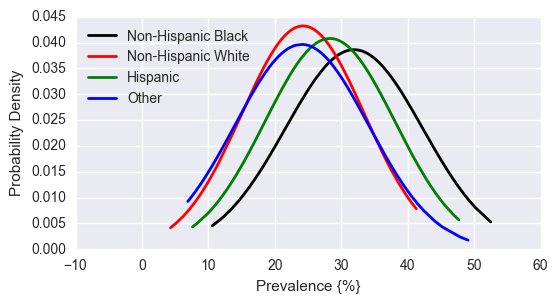

In [127]:
# Plotting probability density for combined RF in the race groups
plot_pdf_group('Non-Hispanic Black', 'Non-Hispanic White', 'Hispanic', 'Other', category='Risk Factors')
plt.xlim([-10,60])

In [128]:
# Calculating confidence intervals for combined RF in the race groups
ConfInt_group('Non-Hispanic Black', 'Non-Hispanic White', 'Hispanic', 'Other', category='Risk Factors', level=0.95)

Category:  Risk Factors
**********************************
Group name:  Non-Hispanic Black
30.6734256712 - 33.1832793096
---------------------------------
Group name:  Non-Hispanic White
23.207218918 - 25.298781082
---------------------------------
Group name:  Hispanic
27.1433035108 - 29.4625359052
---------------------------------
Group name:  Other
22.7146923467 - 25.3848510323
---------------------------------


In [129]:
# One-way Anova
# computing the f test statistic and p value for RF in the race groups
f_val, p_val = stats.f_oneway(rf_race_b, rf_race_w, rf_race_h, rf_race_o)
print('Category: ', 'Risk Factors')
print('****************************')
print('f value: ', f_val)
print('p value: ', p_val)

Category:  Risk Factors
****************************
f value:  37.6727582928
p value:  3.9981650601e-23


In [130]:
# Getting statistics on combined CVD in the race groups
statdesc_group('Non-Hispanic Black', 'Non-Hispanic White', 'Hispanic', 'Other', category='Cardiovascular Diseases')

Category:  Cardiovascular Diseases
**********************************
Group name:  Non-Hispanic Black
n:  84
mean:  4.3202380952380945
std:  1.1837973364503098
skewness:  1.1638438939395974
----------------------------------
Group name:  Non-Hispanic White
n:  150
mean:  3.588666666666665
std:  1.0285612389266001
skewness:  0.4955345463578675
----------------------------------
Group name:  Hispanic
n:  34
mean:  3.705882352941177
std:  1.3525446989396535
skewness:  0.5623229360269799
----------------------------------
Group name:  Other
n:  45
mean:  5.846666666666666
std:  3.0164438223400305
skewness:  0.6656987277792743
----------------------------------


(-5, 15)

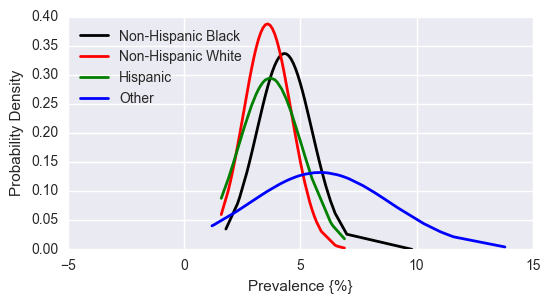

In [131]:
# Plotting probability density for combined CVD in the race groups
plot_pdf_group('Non-Hispanic Black', 'Non-Hispanic White', 'Hispanic', 'Other', category='Cardiovascular Diseases')
plt.xlim([-5,15])

In [132]:
# Calculating confidence intervals for combined CVD in the race groups
ConfInt_group('Non-Hispanic Black', 'Non-Hispanic White', 'Hispanic', 'Other', category='Cardiovascular Diseases', level=0.95)

Category:  Cardiovascular Diseases
**********************************
Group name:  Non-Hispanic Black
4.06556304336 - 4.57491314712
---------------------------------
Group name:  Non-Hispanic White
3.42351418241 - 3.75381915093
---------------------------------
Group name:  Hispanic
3.2444131236 - 4.16735158228
---------------------------------
Group name:  Other
4.95538085249 - 6.73795248084
---------------------------------


In [133]:
# One-way Anova
# computing the f test statistic and p value for CVD in the race groups
f_val, p_val = stats.f_oneway(cvd_race_b, cvd_race_w, cvd_race_h, cvd_race_o)
print('Category: ', 'Cardiovascular Diseases')
print('****************************')
print('f value: ', f_val)
print('p value: ', p_val)

Category:  Cardiovascular Diseases
****************************
f value:  25.5699028868
p value:  8.39678545655e-15


**There is a stastically significant difference in the prevalence of both RF and CVD at the 0.1% level between different races / ethnic groups. Hispanic is rather an ethnic group then a race. It is not clear from metadata who represents the Other race / ethnic group. Asians are not included in this group. Based on 2010 U.S. the other group seems to include Hispanic Mestizos (contributing most), Native American or Alaska Native, Native Hawaiians or Other Pacific Islander, Middle Eastern ethnic group, and multiracial group. White race and Hispanic ethnic group have the lowest prevalence of CVD, and are followed by Black race. The prevalence of CVD is much higher in the Other group in comparison to the others. Surprisingly, the Other group along with the White race have lowest prevalence of RF, while Hispanic group has high prevalence following the Black race.**

**These results confirms previously know Hispanic Paradox and imply that other, non-traditional risk factors contribute to the pathophysiological mechanisms of CVD. Our results are in agreement with the hypothesis that decisive factor contributing to the Hispanic paradox appears to be place of birth, raising the possibility that differing birthing or neonatal practices might be involved via a lack of breastfeeding combined with birth trauma imprinting (both common in American obstetrics) and consequent mental and physical illness, the latter compounded by the impact of psychological problems on the capacity for social networking**.

## 3) Age

In [134]:
# Getting statistics on combined RF in the age groups
statdesc_group('25-44', '45-64', '65+', category='Risk Factors')

Category:  Risk Factors
**********************************
Group name:  25-44
n:  300
mean:  19.868999999999993
std:  8.847542351787116
skewness:  -0.6012123737401234
----------------------------------
Group name:  45-64
n:  300
mean:  30.167666666666683
std:  11.962256805840981
skewness:  -0.04875479727234307
----------------------------------
Group name:  65+
n:  300
mean:  34.66566666666667
std:  19.129374999954624
skewness:  0.2843746190656368
----------------------------------


(-10, 80)

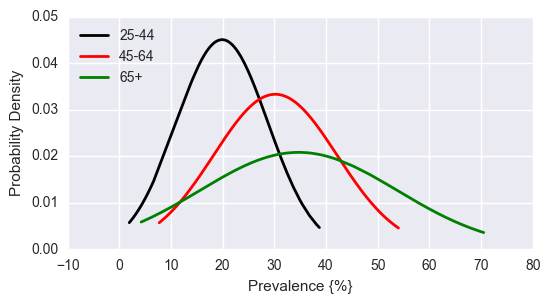

In [135]:
# Plotting probability density for combined RF in the age groups
plot_pdf_group('25-44', '45-64', '65+', category='Risk Factors')
plt.xlim([-10,80])

In [136]:
# Calculating confidence intervals for combined RF in the age groups
ConfInt_group('25-44', '45-64', '65+', category='Risk Factors', level=0.95)

Category:  Risk Factors
**********************************
Group name:  25-44
18.8661519207 - 20.8718480793
---------------------------------
Group name:  45-64
28.8117730427 - 31.5235602906
---------------------------------
Group name:  65+
32.4973970823 - 36.833936251
---------------------------------


In [137]:
# One-way Anova
# computing the f test statistic and p value for RF in the age groups
f_val, p_val = stats.f_oneway(rf_25_44, rf_45_64, rf_65)
print('Category: ', 'Risk Factors')
print('****************************')
print('f value: ', f_val)
print('p value: ', p_val)

Category:  Risk Factors
****************************
f value:  87.8802968363
p value:  1.40248926575e-35


In [138]:
# Getting statistics on combined CVD in the age groups
statdesc_group('25-44', '45-64', '65+', category='Cardiovascular Diseases')

Category:  Cardiovascular Diseases
**********************************
Group name:  25-44
n:  66
mean:  1.0772727272727274
std:  0.41879895174590764
skewness:  0.8059114221613563
----------------------------------
Group name:  45-64
n:  150
mean:  4.228666666666666
std:  1.4043901009176745
skewness:  0.6884320293896322
----------------------------------
Group name:  65+
n:  150
mean:  10.920000000000003
std:  2.7865390720390053
skewness:  0.09381668613663416
----------------------------------


(-5, 20)

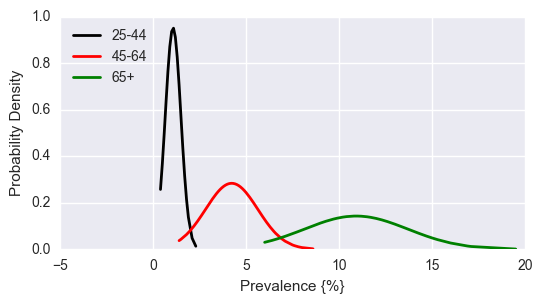

In [139]:
# Plotting probability density for combined CVD in the age groups
plot_pdf_group('25-44', '45-64', '65+', category='Cardiovascular Diseases')
plt.xlim([-5,20])

In [140]:
# One-way Anova test
# computing the f test statistic and p value for the age groups
f_val, p_val = stats.f_oneway(cvd_25_44, cvd_45_64, cvd_65)
print('Category: ', 'Cardiovascular Diseases')
print('****************************')
print('f value: ', f_val)
print('p value: ', p_val)

Category:  Cardiovascular Diseases
****************************
f value:  695.555345651
p value:  6.70977171697e-125


**As expected, aging is signifucant factor leading to CVD, though the difference in the prevalence of RF among the age groups is smaller then that of CVD.**